In [44]:
#A “classificação” de uma palavra é a sua posição em uma lista de palavras classificadas por frequência: a palavra mais comum tem a classificação 1, a segunda mais comum é 2 etc.
#A lei de Zipf descreve a relação entre classificações e frequências das palavras em linguagens naturais (http://en.wikipedia.org/wiki/Zipf’s_law). Ela prevê especificamente que a frequência, , da palavra com classificação  é:

#onde s e c são parâmetros que# dependem do idioma e do texto. Se você tomar o logaritmo de ambos os lados desta equação, obtemos:

#Se você traçar o log de f contra o log de r, terá uma linha reta com uma elevação -s e interceptar o log de c.

#- Escreva um programa que leia um texto em um arquivo, conte as frequências das palavras e exiba uma linha para cada palavra, em ordem descendente da frequência, com log de f e log de r. Use o programa gráfico de sua escolha para traçar os resultados e verifique se formam uma linha reta. Você pode estimar o valor de s?

import matplotlib.pyplot as plt
import numpy as np

arq = open("frankstein.txt", "r")
dict ={}
for i in arq.readlines():
    for word in i.split():
        if word in dict:
            dict[word] = dict[word]+1
        else:
            dict[word]=1
oc = dict.values()
oc.sort()
oc.reverse()
X = np.array(range(len(oc)))+1
Y = np.array(oc)
logx = np.log(X)
logy = np.log(Y)
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
x = plt.gca()
ax.set_title("Frequencia de palavras do Frankstein")
ax.set_xlabel("rank")
ax.set_ylabel("freq")
plt.plot(logx, logy)


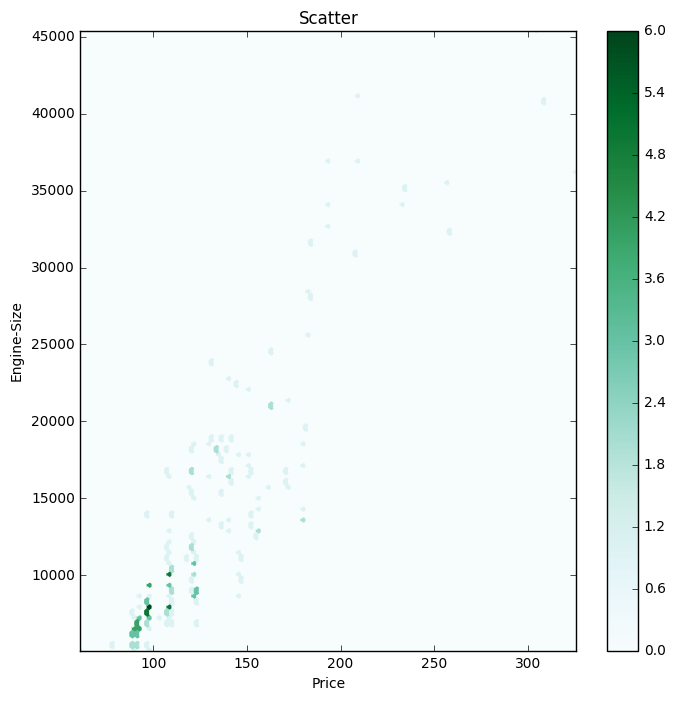

In [1]:
#Exercício 2
#Agora que você já viu como criar alguns plots simples, é sua vez de realizar uma visualização. Crie o seguinte gráfico de dispersão:

#Traçar o tamanho do motor contra o preço.
#Defina o tamanho da figura como 8 x 8.
#Forneça um título significativo, rótulo do eixo x e rótulo do eixo y.

def read_auto_data(fileName = "Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
#    auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
auto_prices.plot(kind = "hexbin", x="engine-size", y = "price", ax=ax)
ax.set_title("Scatter")
ax.set_xlabel("Price")
ax.set_ylabel("Engine-Size")